# Asset Aunthentication

Autenticación y autorización de activos del entorno

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
enlace="G:\Mi unidad\TRABAJO DE GRADO_2D SEMESTRE\DATAFRAME ELEGIDOS\Data Base\Asset_Authentication_new.csv"
df=pd.read_csv(enlace)

In [5]:
df.head(3)

,timestamp,json.destination_user,json.source_json.eventData.TargetDomainName,json.r7_context.destination_user.domain,json.destination_account,json.source_json.computerName,json.source_json.eventData.IpPort,json.destination_asset_address,json.source_json.eventCode,json.result,json.timestamp,json.source_json.timeGenerated,json.service,json.source_asset_address,fecha,hora
0,1712532214319,sst.bflim43,TUMACO.MIL.CO,tumaco.mil.co,sst.bflim43,S4-BFLIM40.tumaco.mil.co,51699.0,172.24.117.68,4624.0,SUCCESS,2024-04-07T23:18:26.476Z,20240407231826.476818-000,kerberos,172.24.117.68,2024/04/07,18:18:26
1,1712532214319,sst.bflim43,TUMACO.MIL.CO,tumaco.mil.co,sst.bflim43,S4-BFLIM40.tumaco.mil.co,51700.0,172.24.117.68,4769.0,SUCCESS,2024-04-07T23:18:26.474Z,20240407231826.474015-000,kerberos,172.24.117.68,2024/04/07,18:18:26
2,1712532214319,cot.bim40,TUMACO.MIL.CO,tumaco.mil.co,cot.bim40,S4-BFLIM40.tumaco.mil.co,55640.0,172.24.118.70,4624.0,SUCCESS,2024-04-07T23:18:19.912Z,20240407231819.912936-000,kerberos,172.24.118.70,2024/04/07,18:18:19


# Visualización y agrupación por hora 

# 1. TargetDomainName

Dominio objetivo al cual se está intentando autenticar o acceder. Este campo es común en los registros de eventos de seguridad y auditoría, especialmente en sistemas basados en Windows

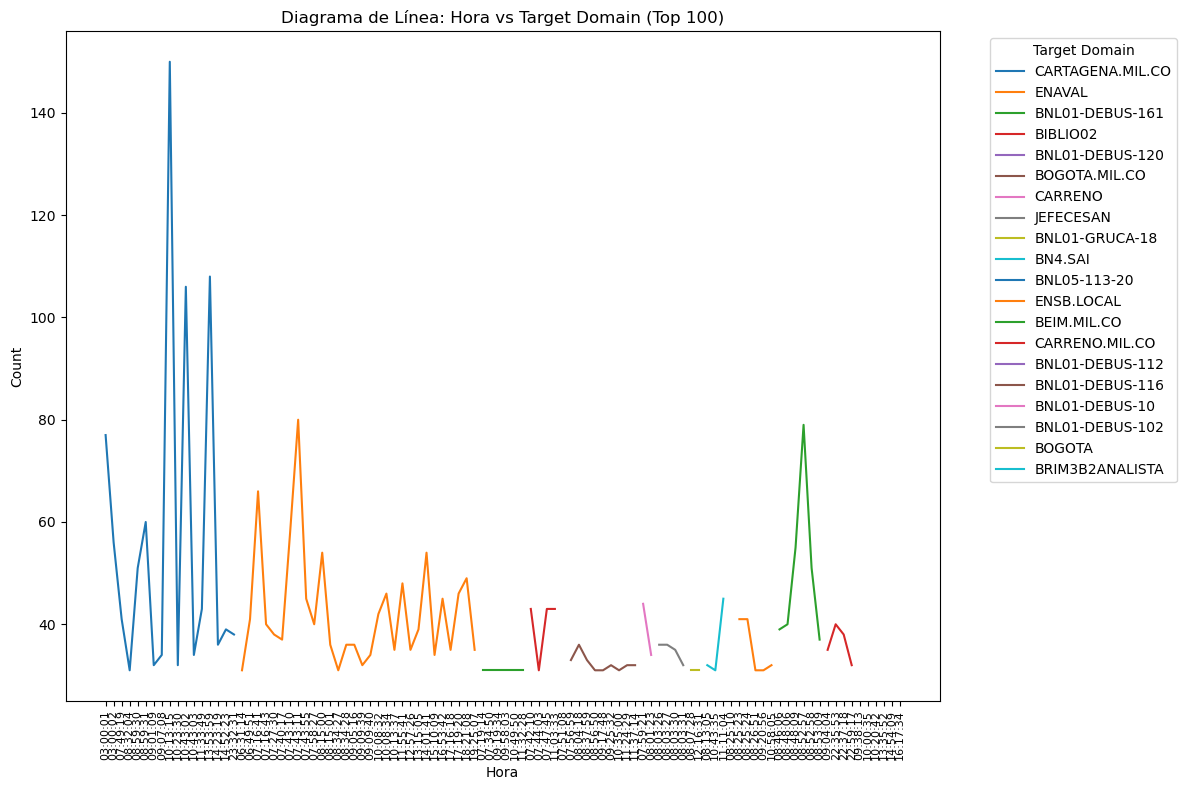

In [14]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_json.eventData.TargetDomainName']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(100).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(12, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.source_json.eventData.TargetDomainName'].unique():
    subset = top_100[top_100['json.source_json.eventData.TargetDomainName'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs Target Domain (Top 100)')
plt.legend(title='Target Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()

# 2. json.r7_context.destination_user.domain
Dominio del usuario destino de un evento de autenticación o acceso.

In [15]:
df["json.r7_context.destination_user.domain"].unique()

array(['tumaco.mil.co', 'tumaco', nan, 'ensb.local', 'enaval',
       'bogota.mil.co', 'cartagena.mil.co', 'bn2.armada.mil.co', 'bn20',
       'bn4.sai', 'bn4', 'leguizamo.mil.co', 'carreno', 'carreno.mil.co',
       'cartagena', 'bogota', 'leguizamo', 'difin.co', 'ensb',
       'enaval.arc', 'grupecol0', 'grupecol.com', 'difin', 'recoip',
       'recoip.mil.co', 'beim', 'esin_', 'RECOIC', 'beim.mil.co',
       'SEITP2'], dtype=object)

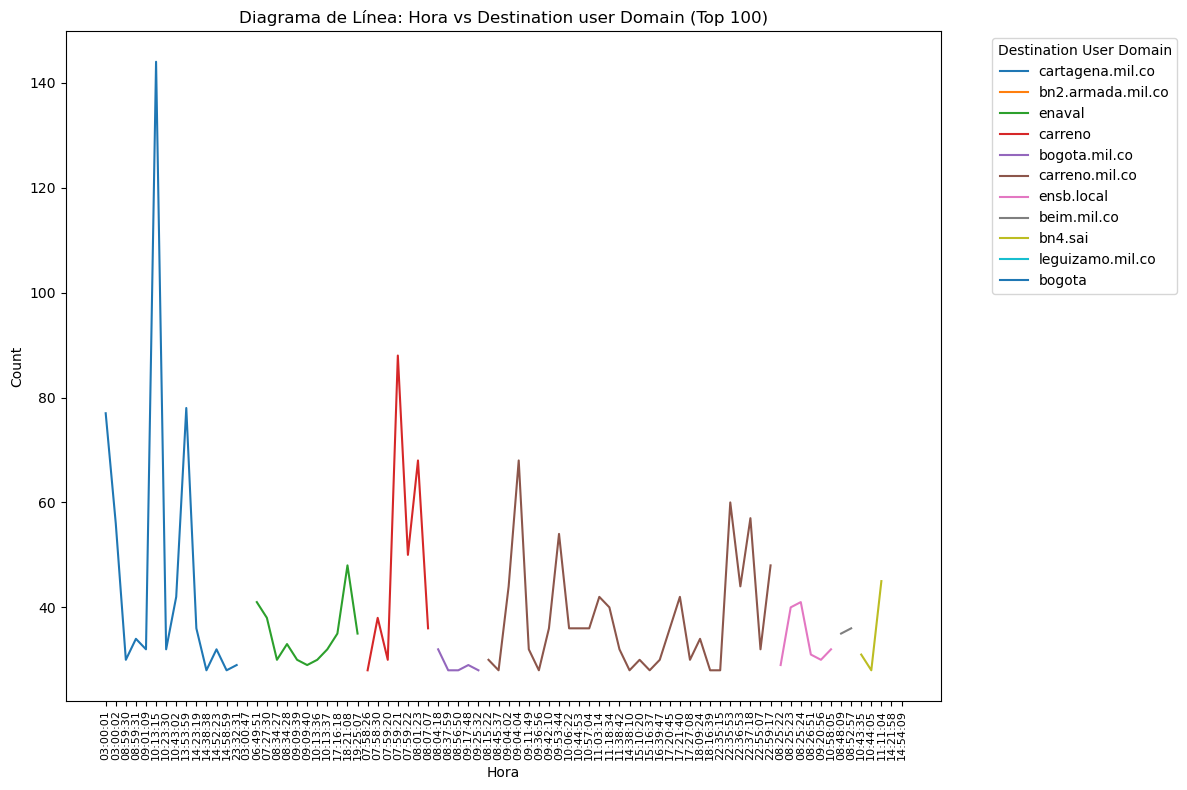

In [16]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.r7_context.destination_user.domain']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(80).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(12, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.r7_context.destination_user.domain'].unique():
    subset = top_100[top_100['json.r7_context.destination_user.domain'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs Destination user Domain (Top 100)')
plt.legend(title='Destination User Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()

# 3. 	EventData.IpPort

En el contexto de registros de eventos de seguridad, específicamente en sistemas como los de Windows o soluciones SIEM (Security Information and Event Management), se refiere al puerto IP a través del cual se está llevando a cabo una comunicación de red.


In [30]:
df["json.source_json.eventData.IpPort"].unique()

array(['51699', '51700', '55640', ..., '2363', '21769', '21760'],
      dtype=object)

Los codigos no se encuentran o no son  comúnmente conocidos o registrados, por lo que puede ser utilizado por aplicaciones personalizadas o servicios específicos internos 

# Ignorando el Valor Nulo 

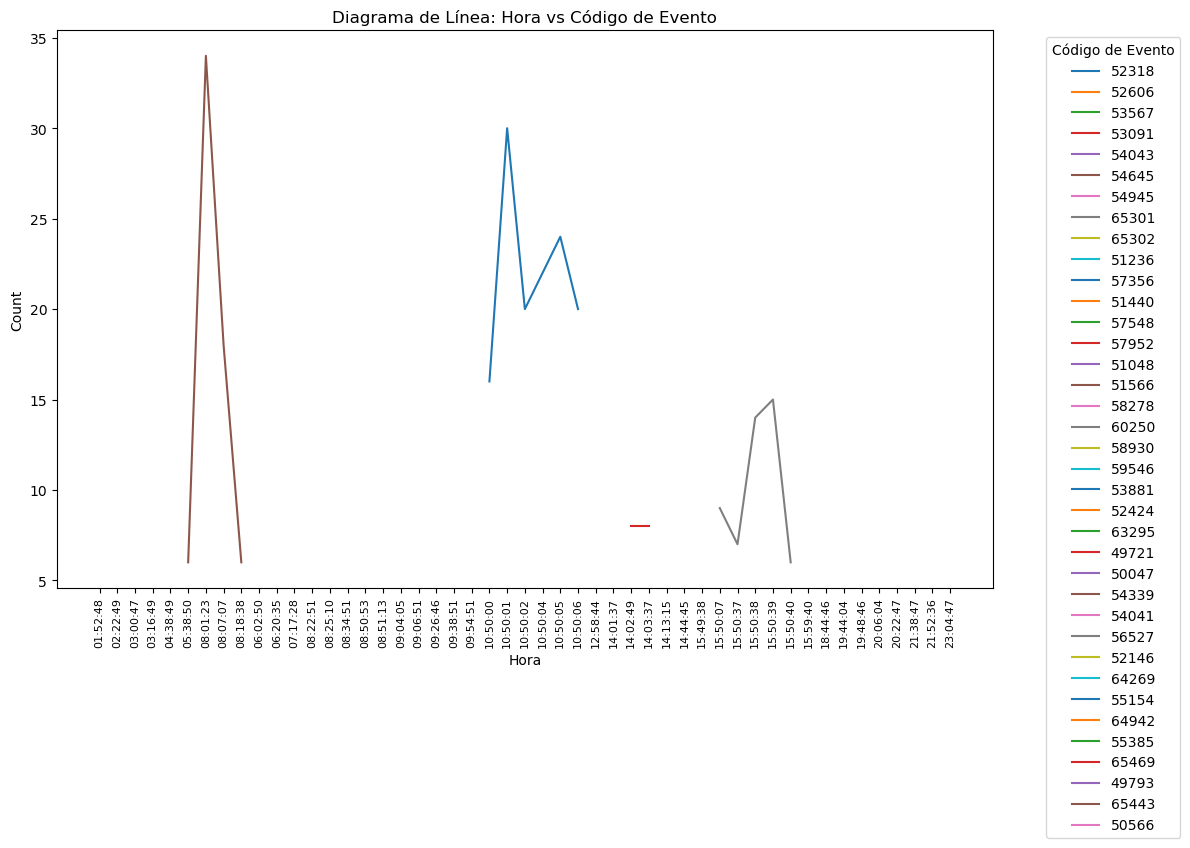

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtrado = df[df['json.source_json.eventData.IpPort'] != '0']

# Paso 2: Agrupar y contar ocurrencias
df_agrupado = df_filtrado.groupby(['hora', 'json.source_json.eventData.IpPort']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 80 registros
top_100 = df_agrupado.head(50).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(12, 8))

# Graficar cada 'json.source_json.eventData.IpPort' individualmente
for ip_port in top_100['json.source_json.eventData.IpPort'].unique():
    subset = top_100[top_100['json.source_json.eventData.IpPort'] == ip_port]
    plt.plot(subset['hora'], subset['count'], label=ip_port)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs Código de Evento')
plt.legend(title='Código de Evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()


In [40]:
df_agrupado.head()

,hora,json.source_json.eventData.IpPort,count
215399,08:01:23,54645,34
254286,08:25:10,51440,32
471046,10:50:01,53881,30
296386,08:51:13,51048,24
146874,07:17:28,51236,24


# Con el Valor Nulo = 0

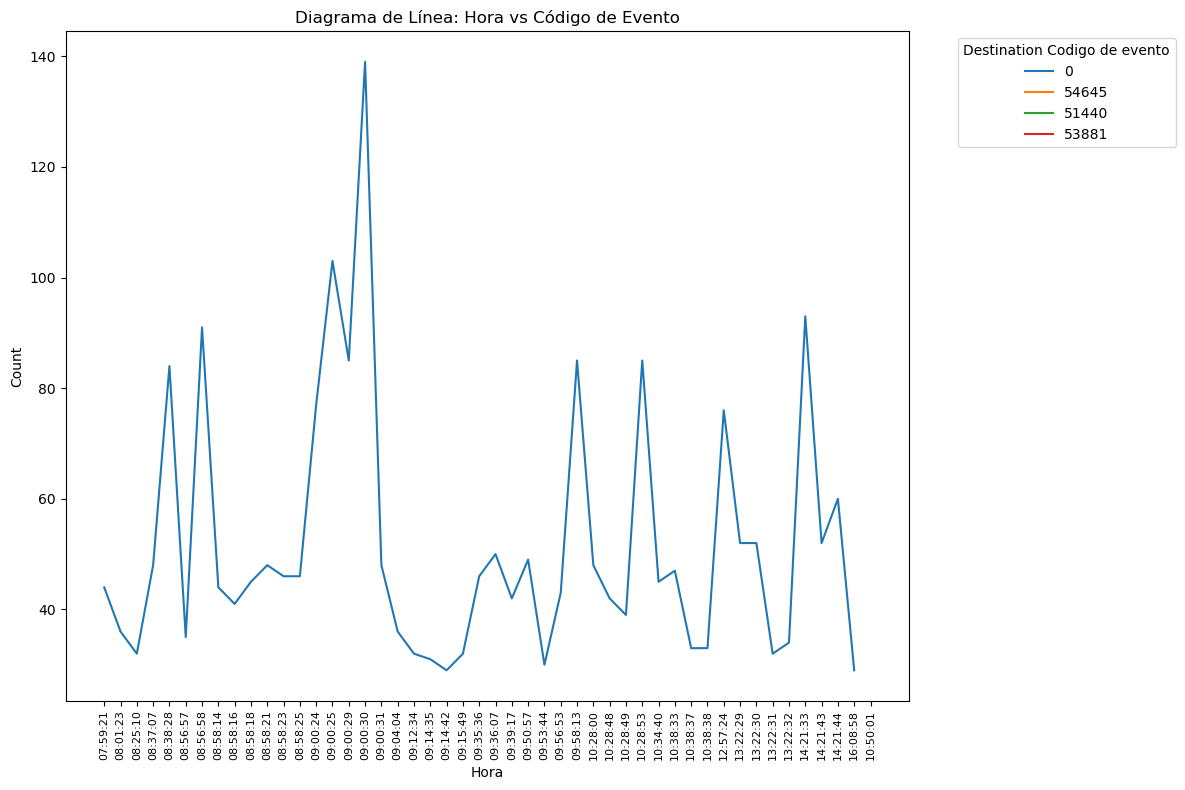

In [41]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_json.eventData.IpPort']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(50).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(12, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.source_json.eventData.IpPort'].unique():
    subset = top_100[top_100['json.source_json.eventData.IpPort'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs Código de Evento')
plt.legend(title='Destination Codigo de evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()

# 4. Json.result 

In [43]:
df["json.result"].unique()

array(['SUCCESS', nan, 'FAILED_BAD_LOGIN', 'FAILED_BAD_PASSWORD',
       'FAILED_OTHER', 'FAILED_ACCOUNT_DISABLED'], dtype=object)

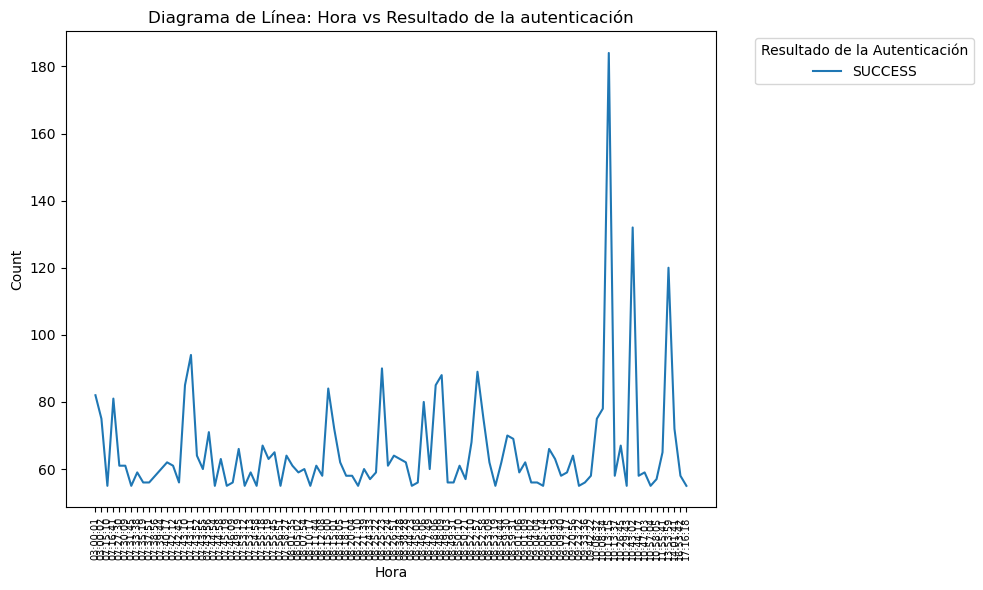

In [51]:
# Agrupar y contar ocurrencias
df_agrupado = df_filtrado.groupby(['hora', 'json.result']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 80 registros
top_100 = df_agrupado.head(100).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(10, 6))

# Graficar cada 'json.source_json.eventData.IpPort' individualmente
for ip_port in top_100['json.result'].unique():
    subset = top_100[top_100['json.result'] == ip_port]
    plt.plot(subset['hora'], subset['count'], label=ip_port)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs Resultado de la autenticación')
plt.legend(title='Resultado de la Autenticación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=7)  # Ajusta el tamaño de la fuente según sea necesario
plt.tight_layout()
plt.show()
